In [1]:
from datetime import datetime, timedelta 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc

In [2]:
start_date = datetime.strptime("01/1/2022", "%d/%m/%Y")
end_date = datetime.strptime("01/1/2025", "%d/%m/%Y")


### Добавляем в генерацию график лоттерей

In [3]:
from subjects.corr_coef import LotteryFig,LotteryCoeff,LotteryScheldure
lottery_scheldure =LotteryScheldure()

In [4]:
start_lottery_date =  datetime.strptime("07/7/2024", "%d/%m/%Y") 
end_lottery_date =  end_date

In [5]:
lottery_am = (end_date-start_lottery_date).days//7
lottery_scheldure =LotteryScheldure()
for curr_lottery_nn in range(lottery_am):
    lottery_day = start_lottery_date + timedelta(days = curr_lottery_nn *7)
    lottery_scheldure.lottery_list.append(LotteryCoeff(lottery_fig = LotteryFig(day_lottery = lottery_day )))


In [6]:
casino_fig, plr_pool = simulator_period(start_date,end_date,trend_func = TrendFunc.make_trend_dict_line,lottery_scheldure = lottery_scheldure)
save_sim_resuls(casino_fig, plr_pool,casino_fig_file_name = 'casino_fig_lottery.csv', plr_pool_file_name = "plr_pool__lottery")

In [7]:
prl_pool_df=pd.read_csv('plr_pool__lottery.csv', parse_dates = ['last_visit'])


In [8]:
prl_pool_df.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,512,292,2024-12-29,-24106.576851,224.774580,-82.556770,115704.0,38.855733,396.246575,1.170670e+06,393.134494,4009.143203
1,768,103,2024-12-25,-2263.696037,453.491610,-21.977631,10013.0,13.497681,97.213592,3.458315e+05,466.186344,3357.587849
2,260,153,2024-12-27,-2147.115543,104.003375,-14.033435,10542.0,11.457660,68.901961,1.065271e+05,115.779813,696.255276
3,521,242,2024-12-23,-35871.734125,205.444829,-148.230306,95496.0,40.154942,394.611570,9.496666e+05,399.323593,3924.242004
4,269,122,2024-12-21,-166.233500,114.533708,-1.362570,8744.0,11.006289,71.672131,8.698381e+04,109.488680,712.982080


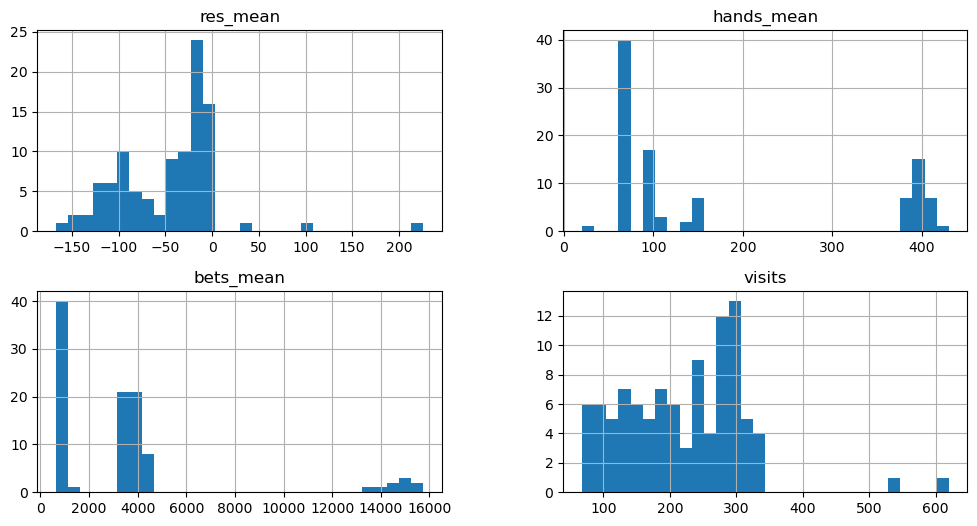

In [9]:
prl_pool_df[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

<Axes: xlabel='Date'>

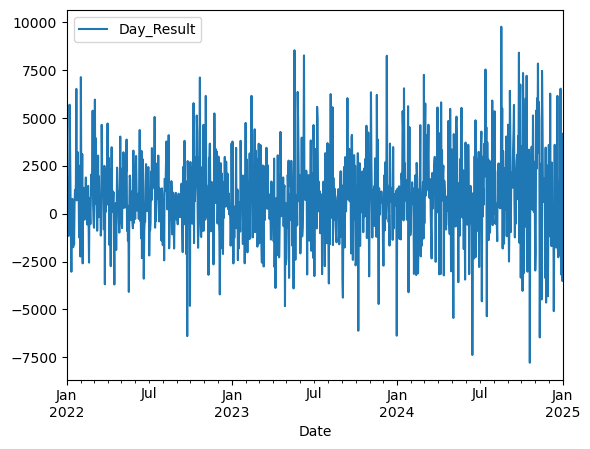

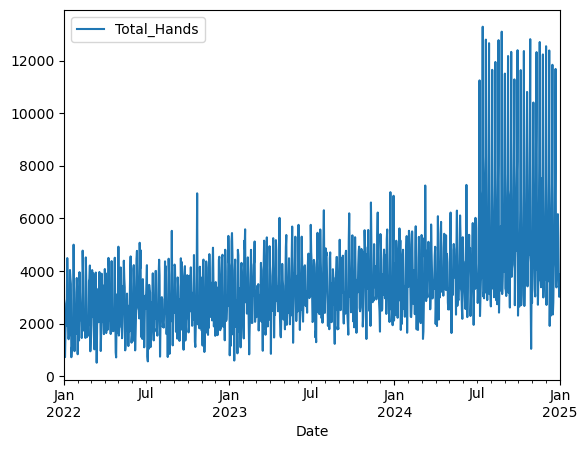

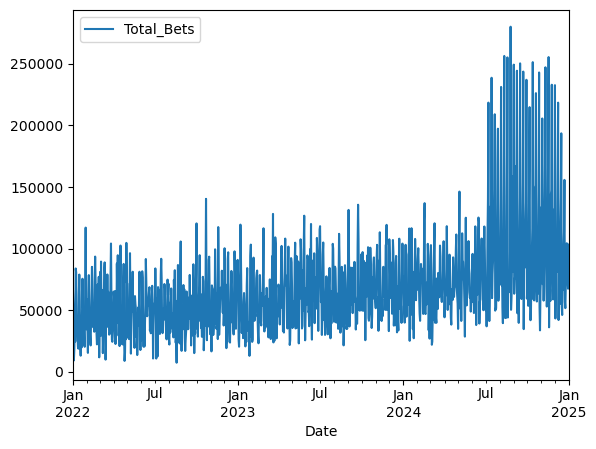

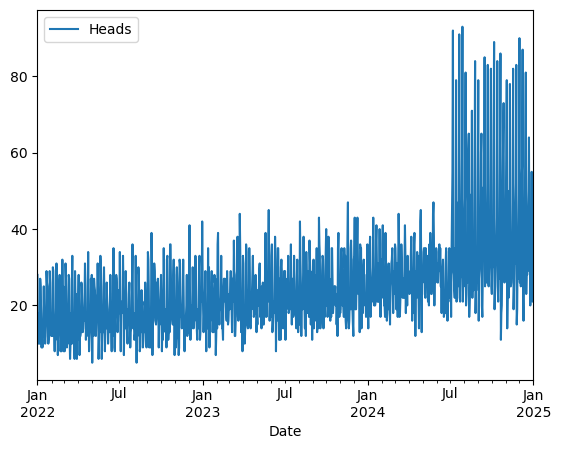

In [10]:
casino_fig[:].plot(x="Date", y ="Day_Result")
casino_fig[:].plot(x="Date", y ="Total_Hands")
casino_fig[:].plot(x="Date", y ="Total_Bets")
casino_fig[:].plot(x="Date", y ="Heads")
